# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 3 - Regression Analysis in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/linear_model.html

Objectives
----
---
     
     > Data Transformation
     > Data Mining
          > Linear Regression
     > Model Evaluation and Prediction
          > Train/Test Split - 70/30
     > Presentation
          > Scatter Plot
    

## Import required libraries and acquire data

NB. The data required was retrieved from the required text for this course. This should assist you in following the concepts from the book better

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = './data/hr_data.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

## Aim: Can we determine a person's `Satisfaction Level` based on the other factors?

age = a(last_evaluation) + b(number_project) + c(average_montly_hours) + d(time_spend_company)

The coefficients a-d, what are they? What is the relationship between the variables? Does multicolinearity exist?

I have created a function below ```create_label_encoder_dict``` to assist with this. The function accepts a dataframe object and uses the ```LabelEncoder``` class from ```sklearn.preprocessing``` to encode (dummy encoding) or transform non-numerical columns to numbers. Finally it returns a dictionary object of all the encoders created for each column.

The LabelEncoder is a useful resource as it not only automatically transforms all values in a column but also keeps a track of what values were transformed from. i.e. It will change all ```Female``` to ```0``` and all ```Male``` to ```1```

In [4]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [5]:
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(sales) = ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
             Encoded Values
IT                        0
RandD                     1
accounting                2
hr                        3
management                4
marketing                 5
product_mng               6
sales                     7
support                   8
technical                 9
Encoder(salary) = ['high' 'low' 'medium']
        Encoded Values
high                 0
low                  1
medium               2


In [6]:
# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2

Transformed data set


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


In [7]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data2[['last_evaluation','number_project','average_montly_hours','time_spend_company']]
Y_data = data2['satisfaction_level']

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30) 

In [9]:
# Import linear model package (has several regression classes)
from sklearn import linear_model


In [10]:
# Create an instance of linear regression
reg = linear_model.LinearRegression()

In [11]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg.coef_

array([ 2.52091853e-01, -3.86756827e-02,  1.02855525e-04, -1.40672606e-02])

In [13]:
X_train.columns

Index(['last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company'],
      dtype='object')

In [14]:
print("Regression Coefficients")
pd.DataFrame(reg.coef_,index=X_train.columns,columns=["Coefficient"])

Regression Coefficients


,Coefficient
last_evaluation,0.252092
number_project,-0.038676
average_montly_hours,0.000103
time_spend_company,-0.014067


In [15]:
# Intercept
reg.intercept_

0.6078482685006579

In [16]:
# Make predictions using the testing set
test_predicted = reg.predict(X_test)
test_predicted

array([0.60151576, 0.64939671, 0.52336411, ..., 0.67138193, 0.69110759,
       0.5978772 ])

In [17]:
data3 = X_test.copy()
data3['predicted_satisfaction_level']=test_predicted
data3['satisfaction_level']=y_test
data3.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,predicted_satisfaction_level,satisfaction_level
14667,0.93,5,223,5,0.601516,0.86
13373,0.89,4,137,3,0.649397,0.78
9246,0.55,5,121,3,0.523364,0.27
12261,0.97,5,263,5,0.615714,0.82
9359,0.54,3,271,3,0.613623,0.97


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predicted))

Mean squared error: 0.06


In [20]:
# Explained variance score: 1 is perfect prediction
# R squared
print('Variance score: %.2f' % r2_score(y_test, test_predicted))

Variance score: 0.06


In [21]:
help(reg.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float


In [22]:
reg.score(X_test,y_test)

0.061684941263884914

### Visualizations

It's difficult to plat a scatter plot with so many dimensions

How about Dimensionality Reduction?

One such method - Principal Component Analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=1)

In [25]:
pca.fit(data2[X_train.columns])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.components_

array([[0.00116455, 0.01030169, 0.99993927, 0.00373904]])

In [27]:
pca.n_features_

4

In [28]:
pca.n_components_

1

Now that we can reduce our components(factors/features) let us plot (X against y)


In [29]:
#Again :
X_test

,last_evaluation,number_project,average_montly_hours,time_spend_company
14667,0.93,5,223,5
13373,0.89,4,137,3
9246,0.55,5,121,3
12261,0.97,5,263,5
9359,0.54,3,271,3
2419,0.66,6,164,5
11647,0.63,4,104,7
13380,0.83,5,216,4
824,0.56,2,138,3
14026,0.81,4,179,3


In [30]:
X_reduced = pca.transform(X_test)
X_reduced

array([[ 21.96652508],
       [-64.04607826],
       [-80.03520079],
       ...,
       [ 61.94250711],
       [-59.05667198],
       [ 41.95387206]])

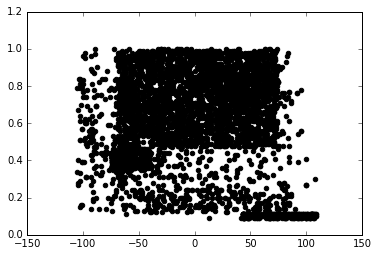

In [31]:
plt.scatter(X_reduced, y_test,  color='black')

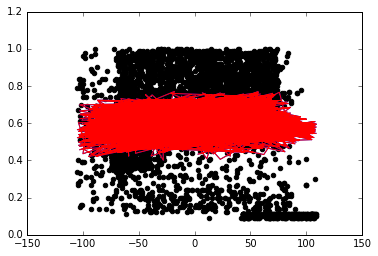

In [32]:
plt.scatter(X_reduced, y_test,  color='black')
plt.plot(X_reduced, test_predicted, color='blue',linewidth=1)
plt.plot(X_reduced, test_predicted, color='red',linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

## Not very insightful? Let us discuss this in class

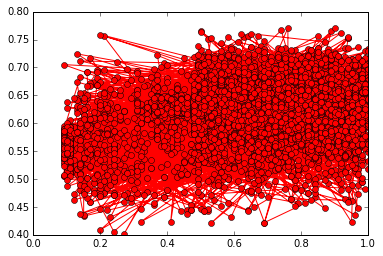

In [33]:
plt.plot(y_test, test_predicted, 'ro-')

In [34]:
np.std(np.abs(y_test-test_predicted))

0.13005465030212102

In [35]:
data4=pd.DataFrame({'actual':y_test,'pred':test_predicted})
data4.head()

,actual,pred
14667,0.86,0.601516
13373,0.78,0.649397
9246,0.27,0.523364
12261,0.82,0.615714
9359,0.97,0.613623


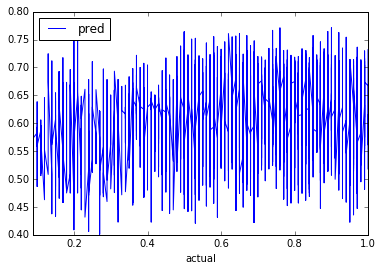

In [36]:
data4.sort_values('actual').plot(kind='line',x='actual',y='pred')

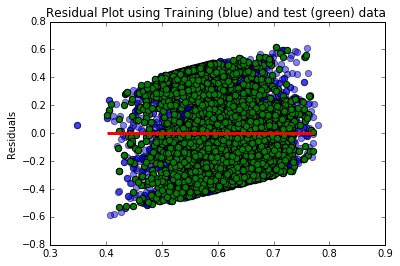

In [37]:
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train,c='b',s=40,alpha=0.5)
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,c='g',s=40)
plt.hlines(y=0,xmin=np.min(reg.predict(X_test)),xmax=np.max(reg.predict(X_test)),color='red',linewidth=3)
plt.title('Residual Plot using Training (blue) and test (green) data ')
plt.ylabel('Residuals')

In [38]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [39]:
import seaborn as sns


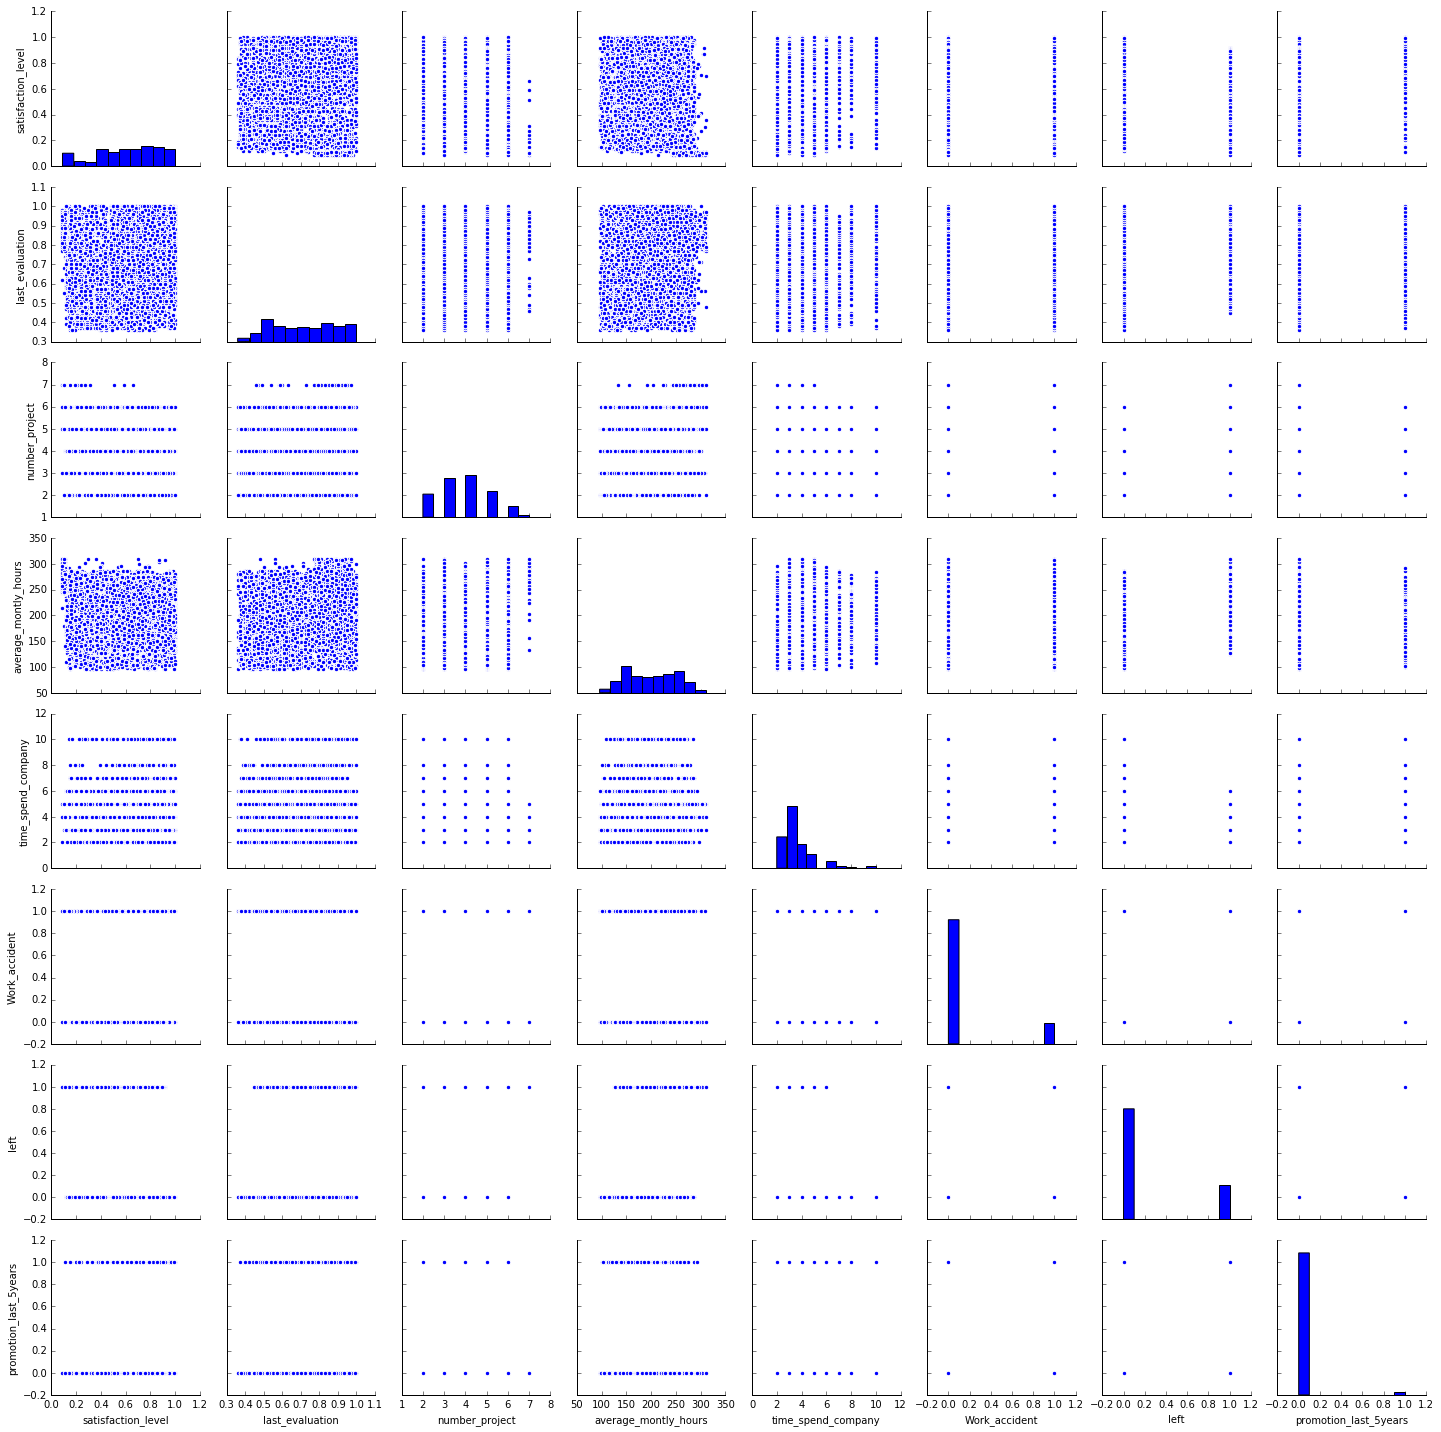

In [40]:
sns.pairplot(data)

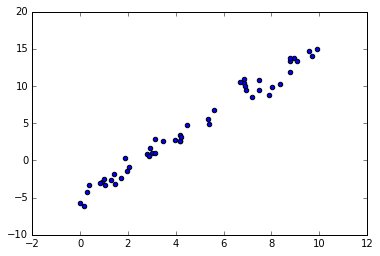

In [42]:


rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

